In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Modeling imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost  import XGBRegressor
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import StratifiedKFold
import optuna
from optuna.samplers import TPESampler
from colorama import Fore, Style
import seaborn as sns

CLR = (Style.BRIGHT + Fore.BLACK) 
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN
RESET = Style.RESET_ALL

FONT_COLOR = "#2D425E"
BACKGROUND_COLOR = "#FFFCFA"

CELL_HOVER = {  # for row hover use <tr> instead of <td>
    "selector": "td:hover",
    "props": "background-color: #F2F2F0",
}
TEXT_HIGHLIGHT = {
    "selector": "td",
    "props": "color: #2D425E; font-weight: bold",
}
INDEX_NAMES = {
    "selector": ".index_name",
    "props": "font-style: italic; font-weight: normal; background-color: #FFFCFA; color: #3E3F4C;",
}
HEADERS = {
    "selector": "th:not(.index_name)",
    "props": "font-style: italic; font-weight: normal; background-color: #FFFCFA; color: #3E3F4C;",
}
DF_STYLE = (INDEX_NAMES, HEADERS, TEXT_HIGHLIGHT)
DF_CMAP = sns.light_palette("#E04C5F", as_cmap=True)

In [2]:
#Reading Files
path = "/Users/larst/OneDrive/Documents/GitHub/KaggleS3E21/data/"
df = pd.read_csv(path+"sample_submission.csv")

In [3]:
df

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [4]:
from sklearn.ensemble import RandomForestRegressor

y_train = df.pop('target') # train is your submission!
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(df, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [5]:
missing_values = pd.DataFrame(index=df.columns)
missing_values["MissingTrain"] = df.isna().sum()
missing_values["MissingTrainNormalised"] = missing_values.MissingTrain / len(df)
missing_values.style.set_table_styles(DF_STYLE).background_gradient(DF_CMAP)

,MissingTrain,MissingTrainNormalised
id,0,0.000000
O2_1,0,0.000000
O2_2,0,0.000000
O2_3,0,0.000000
O2_4,0,0.000000
O2_5,0,0.000000
O2_6,0,0.000000
O2_7,0,0.000000
NH4_1,0,0.000000
NH4_2,0,0.000000


In [6]:
df["BOD5_7"].value_counts

<bound method IndexOpsMixin.value_counts of 0       10.37
1        2.23
2        3.17
3        7.37
4        3.90
        ...  
3495     2.50
3496     2.90
3497     4.20
3498     5.00
3499     2.27
Name: BOD5_7, Length: 3500, dtype: float64>

In [9]:
df = pd.read_csv(path+"sample_submission.csv")

In [10]:
#Baseline random forest model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

Y_train=df['target']
X_train=df.drop(['target'],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [11]:
# Train the regressor on the training data
regressor = RandomForestRegressor(n_estimators=1000, random_state=42,max_depth=7,n_jobs=-1)
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtest)

mae = mean_absolute_error(ytest, ypred)

print("MAE is:", mae)

MAE is: 0.7500398796203548


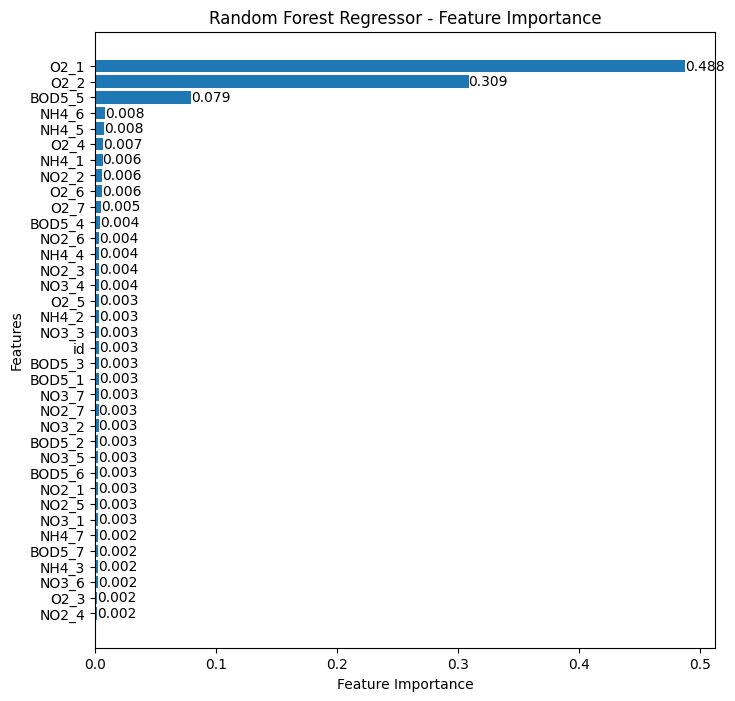

In [12]:
importance = regressor.feature_importances_

# Get feature names
feature_names = xtrain.columns

# Sort feature importance scores and feature names in descending order
sorted_idx = importance.argsort()[::]
sorted_names = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(8, 8))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), sorted_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Regressor - Feature Importance")

for i, v in enumerate(importance[sorted_idx]):
    plt.text(v, i, f"{v:.3f}", color='black', va='center')

plt.show()

In [13]:
O2=['O2_1','O2_2','O2_3','O2_4','O2_5','O2_6','O2_7']
NH4=['NH4_1','NH4_2','NH4_3','NH4_4','NH4_5','NH4_6','NH4_7']
NO3=['NO3_1','NO3_2','NO3_3','NO3_4','NO3_5','NO3_6','NO3_7']
BOD5=['BOD5_1','BOD5_2','BOD5_3','BOD5_4','BOD5_5','BOD5_6','BOD5_7']

<Axes: xlabel='id', ylabel='target'>

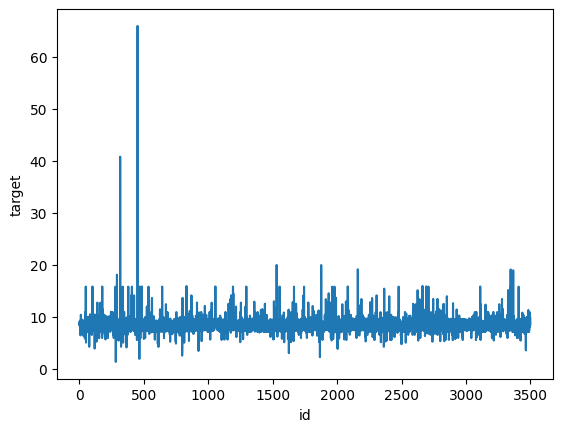

In [14]:
sns.lineplot(data=df, x='id',y='target')

In [15]:
#Two huges peaks :
df[df['target']>20]

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
316,316,40.78,40.90,40.90,9.500,6.805,5.01,8.76,6.805,0.49,...,9.805,4.53,4.42,4.8,3.500,4.650,6.025,5.070,3.850,4.14
451,451,65.93,40.95,65.95,9.265,6.625,5.01,8.37,6.375,0.71,...,7.795,1.73,1.78,4.1,4.645,4.725,5.725,10.645,3.025,3.80


In [16]:
#Also big peaks
df[(df['target']>18) & (df['target']<20)]

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
291,291,18.08,15.90,16.1,9.500,6.500,7.900,8.840,6.40,0.280,...,5.690,1.64,1.73,3.90,2.60,3.150,6.500,5.200,3.250,3.85
1530,1530,19.95,14.90,8.2,9.545,8.370,10.070,8.980,5.03,0.300,...,20.050,3.02,4.32,3.40,4.80,5.800,5.725,8.400,3.500,2.60
1876,1876,19.94,40.90,40.9,9.545,9.265,3.290,9.805,5.03,0.560,...,17.465,1.73,1.73,4.80,4.95,10.665,10.465,10.465,2.155,2.90
2160,2160,19.12,13.50,14.7,9.545,8.370,3.290,9.805,5.03,0.122,...,2.230,1.73,1.80,4.10,5.40,4.725,6.075,5.725,2.950,7.37
3346,3346,19.08,19.50,40.9,10.070,7.700,4.950,10.260,7.15,0.040,...,7.795,1.73,1.80,3.52,4.80,4.725,5.725,5.567,3.155,3.90
3366,3366,18.93,4.65,17.1,9.265,6.550,9.265,9.265,5.55,0.340,...,6.690,12.36,8.45,6.40,7.30,2.150,6.500,7.230,2.210,2.10



    High peaks: 316, 451
    Slight peaks: 291,1530,1876,2160,3346,3366


Text(0.5, 1.0, 'Time Series Plot for O2')

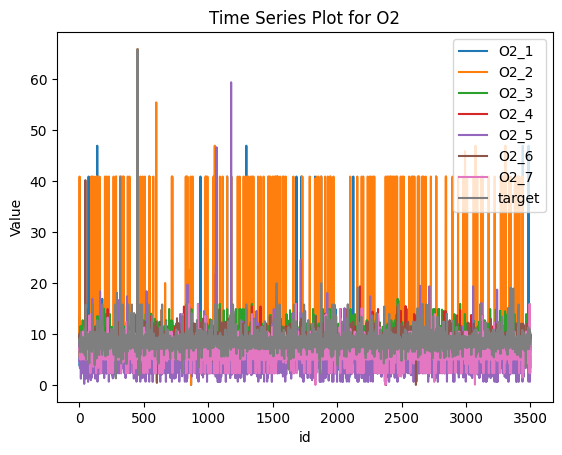

In [17]:
for i in O2:
    sns.lineplot(data=df, x='id',y=i,label=i)
    
sns.lineplot(data=df, x='id',y='target',label='target')
    
plt.ylabel('Value')
plt.title('Time Series Plot for O2')

In [18]:
sample_new=df.copy()

rows_to_remove = [596, 2664, 1291] 
sample_new = sample_new.drop(rows_to_remove)

In [19]:
to_ignore=list(sorted_names[::-1][10:])
for i in to_ignore:
    sample_new[i]=0



In [20]:
Y_train=sample_new['target']
X_train=sample_new.drop(['target'],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)



In [21]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=42,max_depth=7,n_jobs=-1)
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtest)

mae = mean_absolute_error(ytest, ypred)

print("mae is:", mae)

mae is: 0.7444435157085075


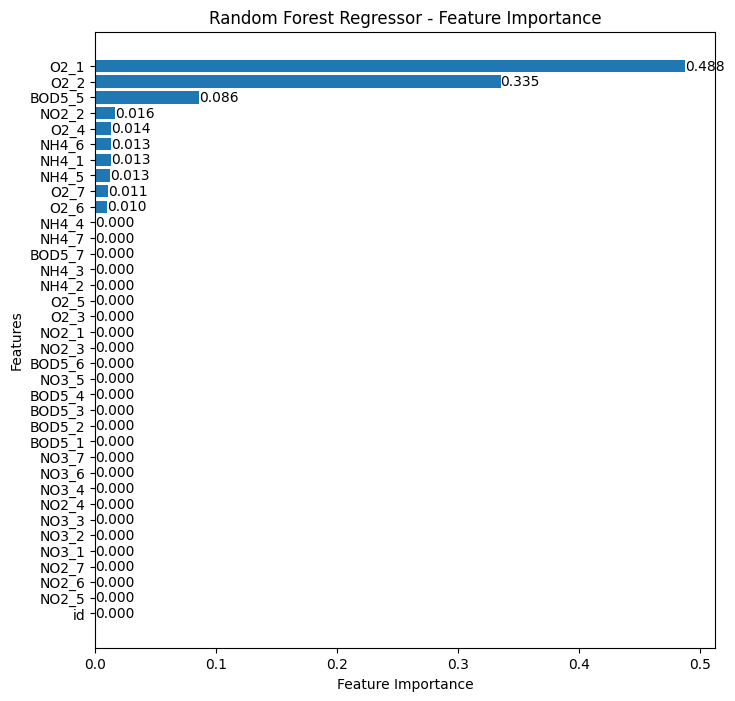

In [22]:
importance = regressor.feature_importances_

# Get feature names
feature_names = xtrain.columns

# Sort feature importance scores and feature names in descending order
sorted_idx = importance.argsort()[::]
sorted_names = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(8, 8))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), sorted_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Regressor - Feature Importance")

for i, v in enumerate(importance[sorted_idx]):
    plt.text(v, i, f"{v:.3f}", color='black', va='center')

plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(sample_new)
df_scaled = pd.DataFrame(scaled)
df_scaled.columns = df.columns

In [24]:
Y_train=df_scaled['target']
X_train=df_scaled.drop(['target'],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [25]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=42,max_depth=7,n_jobs=-1)
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtest)

mae = mean_absolute_error(ytest, ypred)

print("mae is:", mae)

mae is: 0.011508546212189356
